# ABOUT:
- in this notebook:
    - Categorical Features with too many NAs were given a **new class** for NAs
    - Categorical Features with a small percentage of NAs had the NAs replaced with **mode**
    - Categorical Features are **label encoded** 
    - Used **Countplots** to visualise categoric features agaiat the labels

### import categorical data

In [2]:
import pandas as pd
train_features = pd.read_csv(r"C:\Users\tanch\Documents\Coding Competitions\DataDriven\Flu Shot Learning\local\data\training_set_features.csv")
train_labels = pd.read_csv(r"C:\Users\tanch\Documents\Coding Competitions\DataDriven\Flu Shot Learning\local\data\training_set_labels.csv")
test_features = pd.read_csv(r"C:\Users\tanch\Documents\Coding Competitions\DataDriven\Flu Shot Learning\local\data\test_set_features.csv")
train_features['set'] = "train" 
test_features['set'] = "test" 
cat_features = pd.concat([train_features,test_features]).select_dtypes(["object"])

In [3]:
from datasets import ClassLabel, Sequence
import pandas as pd
from IPython.display import display, HTML
def show_elements(dataset, randomize = True, num_samples = 10):
    
    if isinstance(dataset,pd.DataFrame):                  # if DataFrame 
        if randomize:                                          # if random> shuffle
            dataset = dataset.sample(frac=1)
        display(HTML(dataset.iloc[:num_samples].to_html()))             # take first n rows
    
    else:                                                    # if not DataFrame
        if randomize:                                           # if random> shuffle
            dataset = dataset.shuffle()   
        dataset = pd.DataFrame(dataset.select(range(num_samples)))   # convert first n rows to dataframe
        display(HTML(dataset.to_html()))
    

In [4]:
show_elements(cat_features,randomize = True, num_samples=7)

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation,set
6713,18 - 34 Years,NaN,Hispanic,Female,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Principle City",rucpziij,tfqavkke,train
2470,55 - 64 Years,College Graduate,White,Female,NaN,Not Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",wxleyezf,emcorrxb,test
14284,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",vjjrobsf,bxpfxfdn,test
18106,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,"MSA, Principle City",NaN,NaN,test
4010,55 - 64 Years,12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,"MSA, Principle City",NaN,NaN,train
7101,45 - 54 Years,Some College,White,Female,"> $75,000",Married,Own,Employed,oxchjgsf,"MSA, Principle City",fcxhlnwr,mxkfnird,test
22005,65+ Years,< 12 Years,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,Non-MSA,nduyfdeo,pvmttkik,train


### Visualise NAs
- employment industry and employment occupation has a significant number of NAs

<AxesSubplot:>

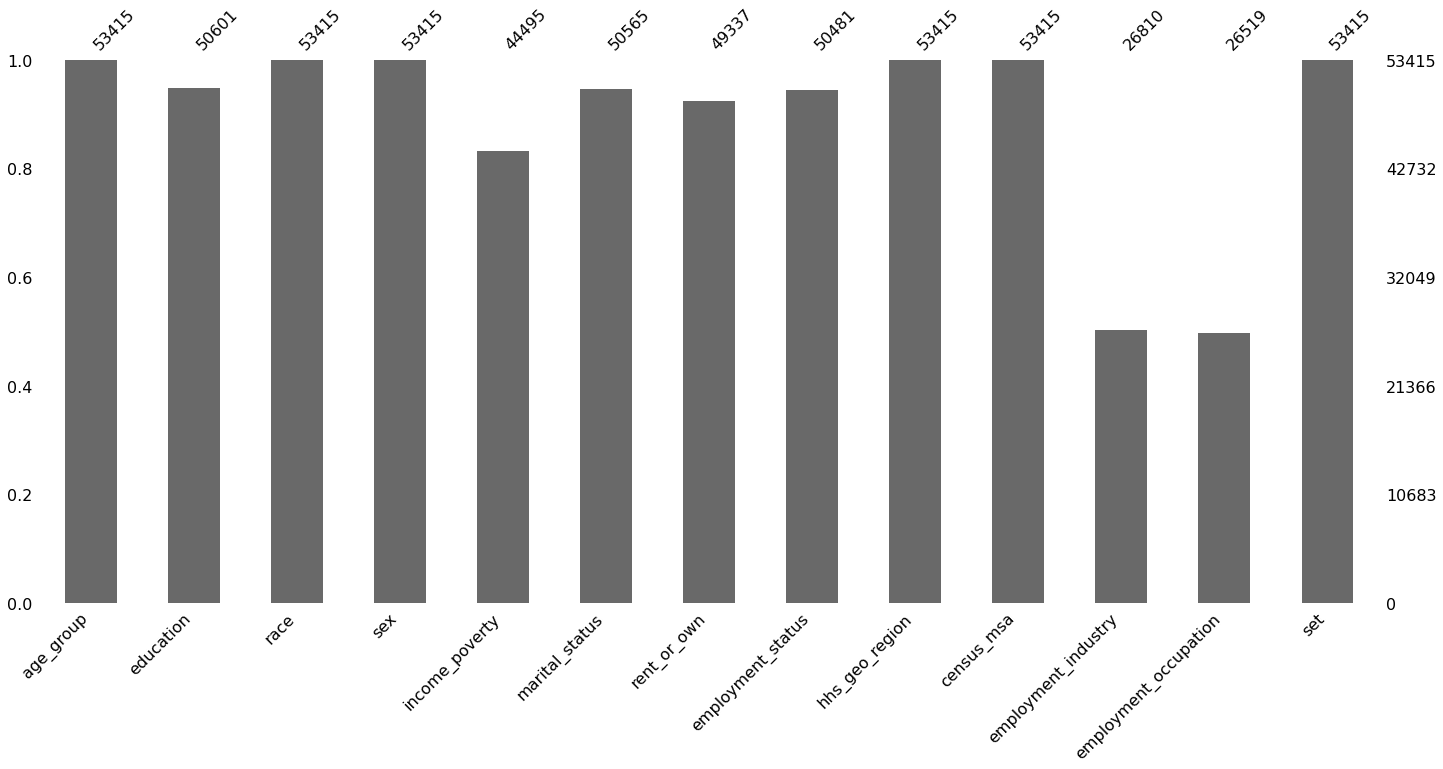

In [5]:
import missingno as msno
msno.bar(cat_features)

## Dealing with NAs
- with the exception of "employment industry" and "employment occupation" feature, which has almost 50% NAs, we **replace NAs with mode**
- for "employment_industry" and "employment_occupation" we **replace NAs with new class**

In [28]:
no_fill_columns = ["employment_industry","employment_occupation"]

for col in cat_features.columns:
    if col not in no_fill_columns:
        mode = cat_features[col].mode().values[0]
        cat_features[col].fillna(mode,inplace = True)
    else:
        cat_features[col].fillna("NA",inplace = True)

## Encode nominal features
- for these feature, we do not care about their order

In [29]:
nominal_colnames = ['employment_status', 'employment_industry', 'employment_occupation', 'health_insurance', 'race', 'employment_status', 'census_msa', 'hhs_geo_region']

In [30]:
encodings = {}
for i,col in enumerate(cat_features.columns[:-1]):
    if col in nominal_colnames:
        encodings[col] = {v:i for i,v in enumerate(cat_features[col].unique())}
        cat_features[col] = cat_features[col].map(encodings[col])

In [31]:
for k,v in encodings.items():
    print(f"{k} encodings:\n{v}\n")

race encodings:
{'White': 0, 'Black': 1, 'Other or Multiple': 2, 'Hispanic': 3}

employment_status encodings:
{'Not in Labor Force': 0, 'Employed': 1, 'Unemployed': 2}

hhs_geo_region encodings:
{'oxchjgsf': 0, 'bhuqouqj': 1, 'qufhixun': 2, 'lrircsnp': 3, 'atmpeygn': 4, 'lzgpxyit': 5, 'fpwskwrf': 6, 'mlyzmhmf': 7, 'dqpwygqj': 8, 'kbazzjca': 9}

census_msa encodings:
{'Non-MSA': 0, 'MSA, Not Principle  City': 1, 'MSA, Principle City': 2}

employment_industry encodings:
{'NA': 0, 'pxcmvdjn': 1, 'rucpziij': 2, 'wxleyezf': 3, 'saaquncn': 4, 'xicduogh': 5, 'ldnlellj': 6, 'wlfvacwt': 7, 'nduyfdeo': 8, 'fcxhlnwr': 9, 'vjjrobsf': 10, 'arjwrbjb': 11, 'atmlpfrs': 12, 'msuufmds': 13, 'xqicxuve': 14, 'phxvnwax': 15, 'dotnnunm': 16, 'mfikgejo': 17, 'cfqqtusy': 18, 'mcubkhph': 19, 'haxffmxo': 20, 'qnlwzans': 21}

employment_occupation encodings:
{'NA': 0, 'xgwztkwe': 1, 'xtkaffoo': 2, 'emcorrxb': 3, 'vlluhbov': 4, 'xqwwgdyp': 5, 'ccgxvspp': 6, 'qxajmpny': 7, 'kldqjyjy': 8, 'mxkfnird': 9, 'hfxkjkmi':

## Encode ordinal features
- for these features, we need to give them an ordinal encoding

In [32]:
ordinal_colnames = ['h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'education', 'income_poverty']
[col for col in cat_features.columns[:-1] if col in ordinal_colnames]

['age_group', 'education', 'income_poverty']

In [33]:
ordinal_encodings = {"age_group":{'18 - 34 Years': 0,'35 - 44 Years': 1,'45 - 54 Years': 2,'55 - 64 Years': 3,'65+ Years':4},
                     "education":{'< 12 Years': 0, '12 Years': 1, 'Some College': 2, 'College Graduate': 3},
                     "income_poverty":{'Below Poverty': 0, '<= $75,000, Above Poverty': 1, '> $75,000': 2}}

In [34]:
for col in ['age_group', 'education', 'income_poverty']:
    cat_features[col] = cat_features[col].map(ordinal_encodings[col])

In [35]:
for k,v in ordinal_encodings.items():
    print(f"{k} encodings:\n{v}\n")

age_group encodings:
{'18 - 34 Years': 0, '35 - 44 Years': 1, '45 - 54 Years': 2, '55 - 64 Years': 3, '65+ Years': 4}

education encodings:
{'< 12 Years': 0, '12 Years': 1, 'Some College': 2, 'College Graduate': 3}

income_poverty encodings:
{'Below Poverty': 0, '<= $75,000, Above Poverty': 1, '> $75,000': 2}



## Encode boolean features

In [36]:
bool_colnames = ['behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'sex', 'marital_status', 'rent_or_own']
[col for col in cat_features.columns[:-1] if col in bool_colnames]

['sex', 'marital_status', 'rent_or_own']

In [37]:
bool_encodings = {"sex":{'Female': 0,'Male': 1},
                     "marital_status":{'Not Married': 0, 'Married': 1},
                     "rent_or_own":{'Own': 0, 'Rent': 1}}

In [38]:
for col in ['sex', 'marital_status', 'rent_or_own']:
    cat_features[col] = cat_features[col].map(bool_encodings[col])

In [39]:
for k,v in bool_encodings.items():
    print(f"{k} encodings:\n{v}\n")

sex encodings:
{'Female': 0, 'Male': 1}

marital_status encodings:
{'Not Married': 0, 'Married': 1}

rent_or_own encodings:
{'Own': 0, 'Rent': 1}



## Plot Countplots
- "employment_industry","employment_occupation" have significantly higher cardinality

In [40]:
cleaned_train_set = pd.concat([cat_features[cat_features['set']=="train"],train_labels],axis=1)
cleaned_test_set = pd.concat([cat_features[cat_features['set']=="test"],test_features.respondent_id],axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

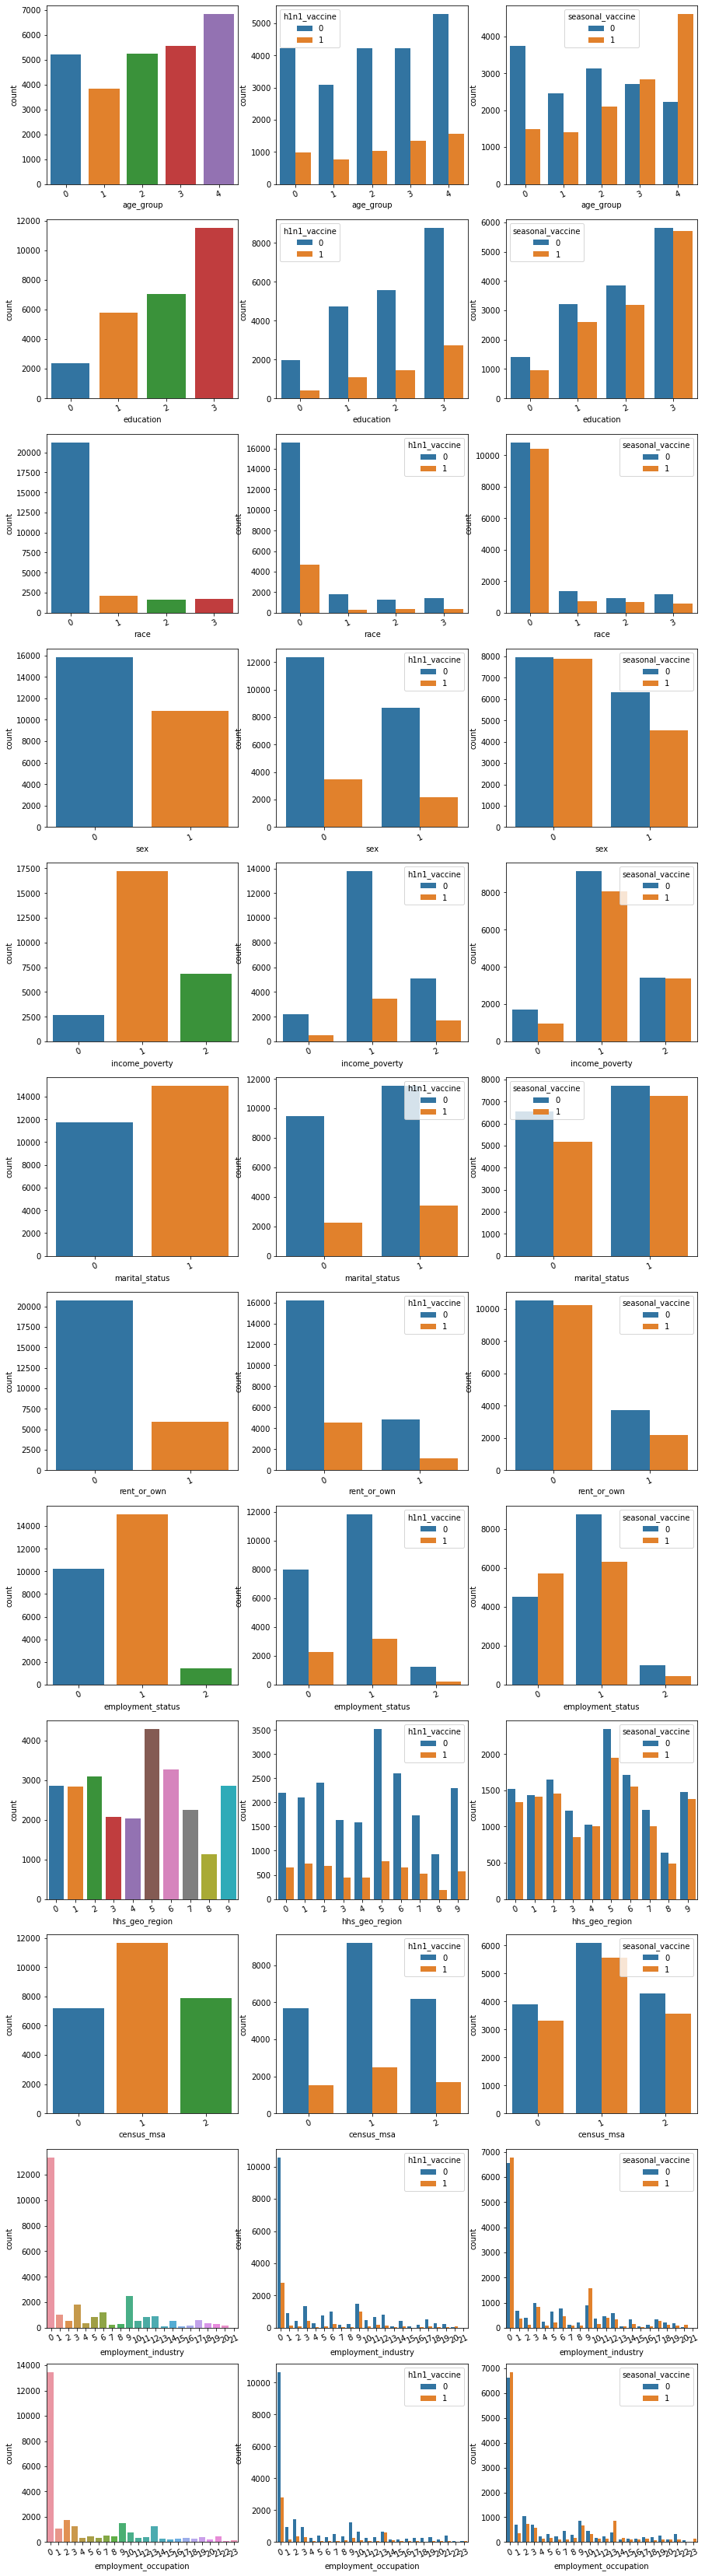

In [41]:
f, axes = plt.subplots(len(cleaned_train_set.columns[:-4]), 3,figsize=(15,5*len(cleaned_train_set.columns[:-4])))
for i,col in enumerate(cleaned_train_set.columns[:-4]):
    c = sns.countplot(data = cleaned_train_set, x = col, ax = axes[i,0])
    c.set_xticklabels(c.get_xticklabels(), rotation=25)
    c = sns.countplot(data = cleaned_train_set, x = col, hue = "h1n1_vaccine", ax = axes[i,1])
    c.set_xticklabels(c.get_xticklabels(), rotation=25)
    c = sns.countplot(data = cleaned_train_set, x = col, hue = "seasonal_vaccine", ax = axes[i,2])
    c.set_xticklabels(c.get_xticklabels(), rotation=25)

## compare_train_test
- test set does not have unexpected values


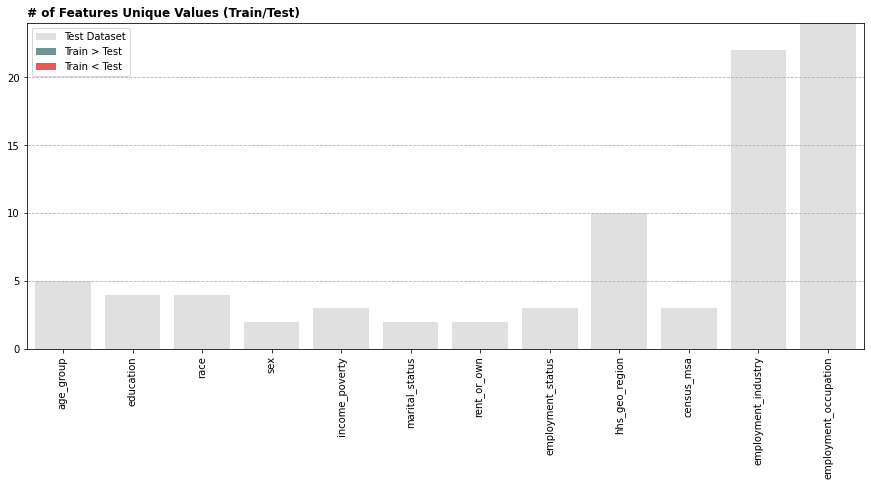

In [20]:
import eda_utilities as eda
eda.compare_train_test_unique_values(cleaned_train_set.iloc[:,:-4],cleaned_test_set.iloc[:,:-2])

## to_csv

In [42]:
cleaned_train_set.drop("set",axis=1).set_index("respondent_id").to_csv(r"C:\Users\tanch\Documents\Coding Competitions\DataDriven\Flu Shot Learning\local\data\cleaned_train_set_categorical.csv")

In [43]:
cleaned_test_set.drop("set",axis=1).set_index("respondent_id").to_csv(r"C:\Users\tanch\Documents\Coding Competitions\DataDriven\Flu Shot Learning\local\data\cleaned_test_set_categorical.csv")

## merge cat and num features

In [44]:
import pandas as pd
train_num = pd.read_csv(r"C:\Users\tanch\Documents\Coding Competitions\DataDriven\Flu Shot Learning\local\data\cleaned_train_set_numerical.csv")
train_cat = pd.read_csv(r"C:\Users\tanch\Documents\Coding Competitions\DataDriven\Flu Shot Learning\local\data\cleaned_train_set_categorical.csv")
test_num = pd.read_csv(r"C:\Users\tanch\Documents\Coding Competitions\DataDriven\Flu Shot Learning\local\data\cleaned_test_set_numerical.csv")
test_cat = pd.read_csv(r"C:\Users\tanch\Documents\Coding Competitions\DataDriven\Flu Shot Learning\local\data\cleaned_test_set_categorical.csv")
train_num.merge(train_cat).set_index("respondent_id").to_csv(r"C:\Users\tanch\Documents\Coding Competitions\DataDriven\Flu Shot Learning\local\data\cleaned_train_set.csv")
test_num.merge(test_cat).set_index("respondent_id").to_csv(r"C:\Users\tanch\Documents\Coding Competitions\DataDriven\Flu Shot Learning\local\data\cleaned_test_set.csv")